## 程式碼
### 設備原因 控制風扇改成控制LED燈 

In [ ]:
from flask import Flask, render_template, request
import RPi.GPIO as GPIO

app = Flask(__name__)

@app.route("/", methods=['GET'])
def main_index(): 
  return render_template('index.html')

@app.route("/LED_ON", methods=['POST'])
def LED_ON():
    led_pin = 23
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(led_pin, GPIO.OUT)
    GPIO.output(led_pin, 1)
    
    return "LED 開啟"
    

@app.route("/LED_OFF", methods=['POST'])
def LED_OFF():
    led_pin = 23
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(led_pin, GPIO.OUT)
    GPIO.output(led_pin, 0)
    
    return "LED 關閉"
    
if __name__ == "__main__":
	app.run(host='0.0.0.0', port=8080, debug=True, threaded=True)

## HTML

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
<body>
    <form action = "LED_ON" method = "POST" enctype = "multipart/form-data">
        <input type = "submit" value="燈亮"/>
    </form>
    <form action = "LED_OFF" method = "POST" enctype = "multipart/form-data"> 
        <input type = "submit" value="燈滅"/>
    </form>
</body>
</html>


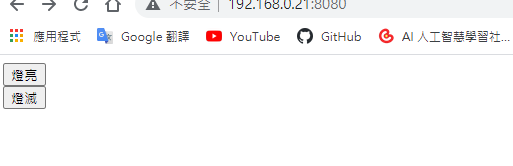

## 樹莓派執行結果

In [ ]:
root@raspberrypi:/home/pi# python3 flask_test.py
 * Serving Flask app "flask_test" (lazy loading)
 * Environment: production
   WARNING: Do not use the development server in a production environment.
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 155-177-060
192.168.0.18 - - [16/Jul/2021 21:46:28] "GET / HTTP/1.1" 200 -
192.168.0.18 - - [16/Jul/2021 21:46:30] "POST /LED_ON HTTP/1.1" 200 -
192.168.0.18 - - [16/Jul/2021 21:46:35] "POST /LED_OFF HTTP/1.1" 200 -
192.168.0.18 - - [16/Jul/2021 21:46:36] "POST /LED_ON HTTP/1.1" 200 -
192.168.0.18 - - [16/Jul/2021 21:46:37] "POST /LED_OFF HTTP/1.1" 200 -
^Croot@raspberrypi:/home/pi#